In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [68]:
tips = sns.load_dataset('tips')

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


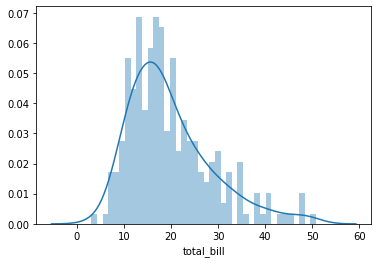

In [25]:
sns.distplot(tips['total_bill'],bins=40)

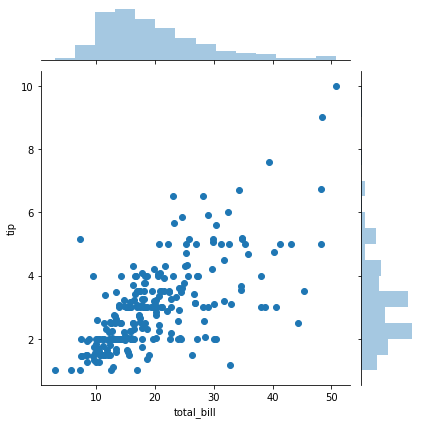

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips)

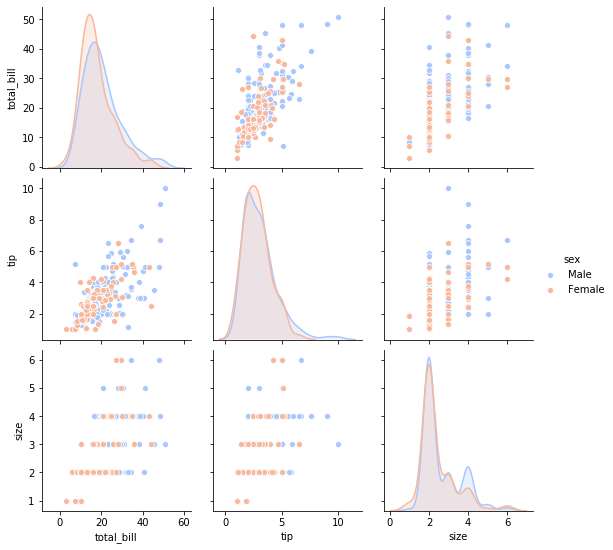

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

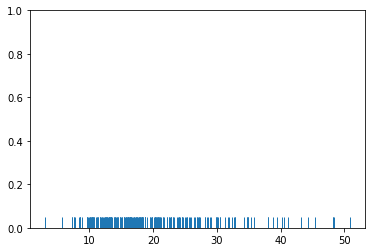

In [21]:
sns.rugplot(tips['total_bill'])

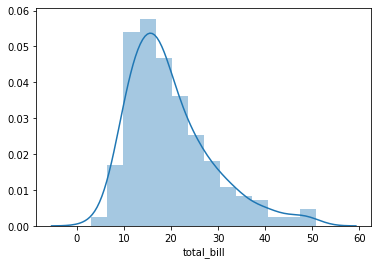

In [23]:
sns.distplot(tips['total_bill'])

(0, 1)

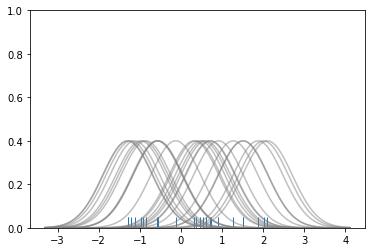

In [24]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [27]:
import numpy as np

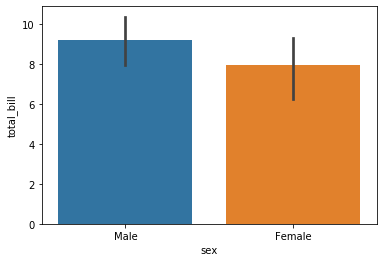

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

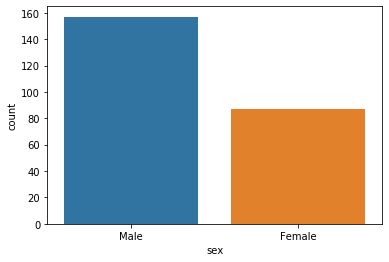

In [29]:
sns.countplot(x='sex',data=tips)

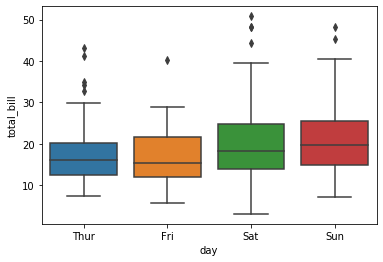

In [32]:
sns.boxplot(x='day',y='total_bill',data=tips)

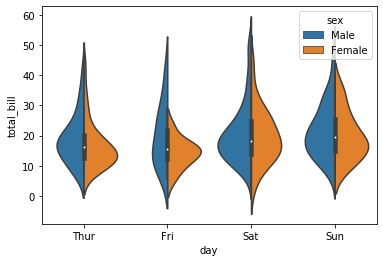

In [35]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

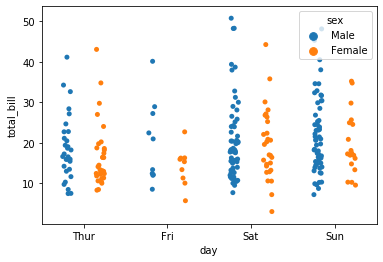

In [38]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

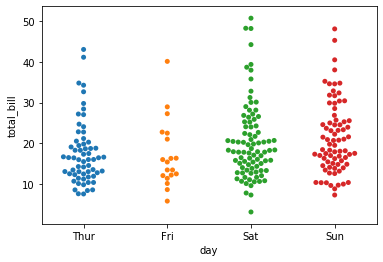

In [39]:
sns.swarmplot(x='day',y='total_bill',data=tips)

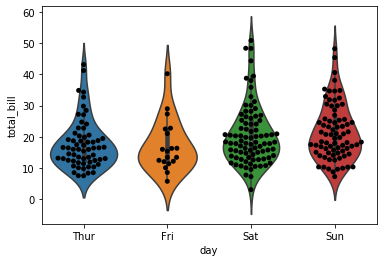

In [40]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

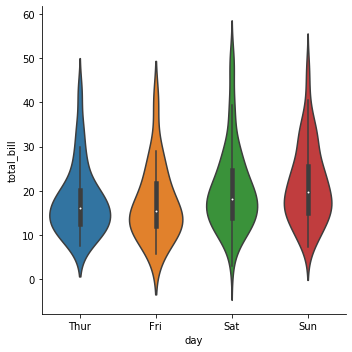

In [43]:
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

In [4]:
flights = sns.load_dataset('flights')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [7]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [9]:
tc = tips.corr()

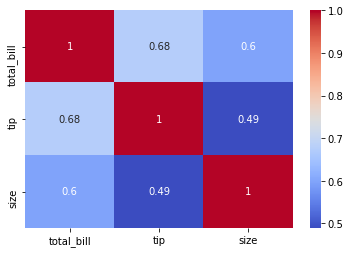

In [13]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [11]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [15]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [18]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [20]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

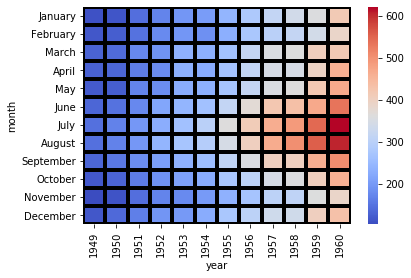

In [25]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidths=3)

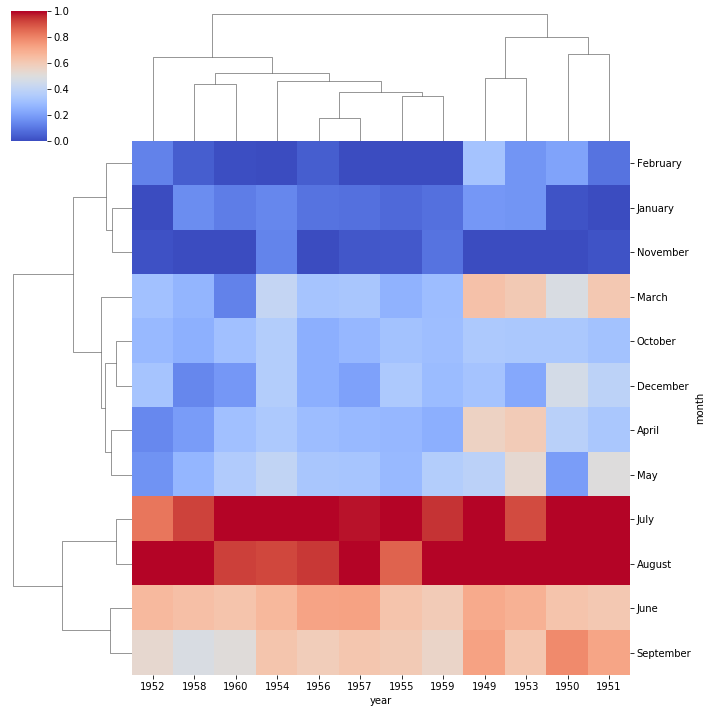

In [28]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [29]:
iris = sns.load_dataset('iris')

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

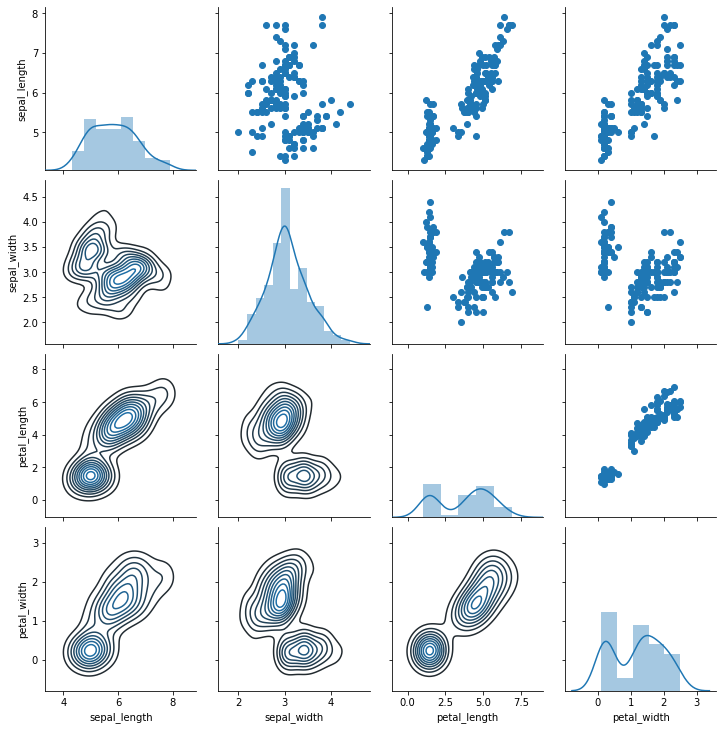

In [39]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

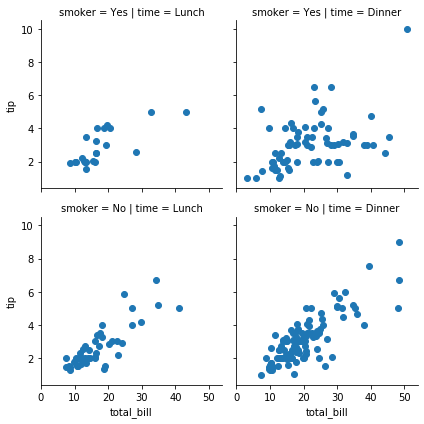

In [44]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

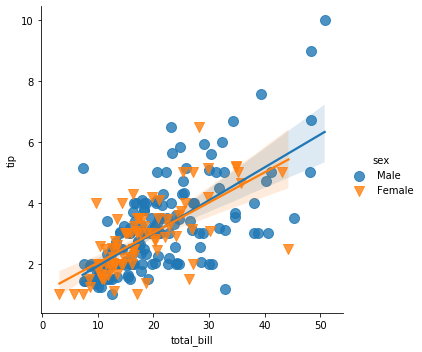

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={"s":100})

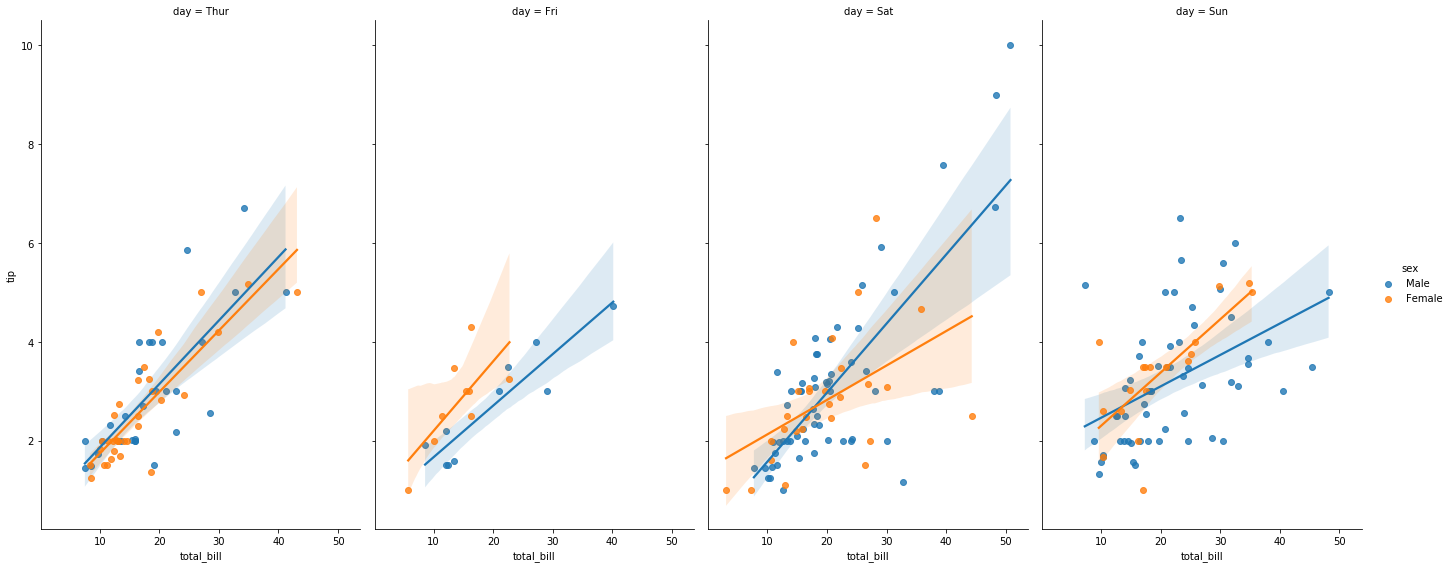

In [67]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,height=8)

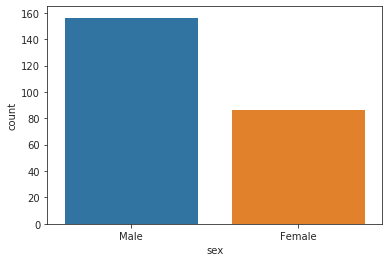

In [81]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

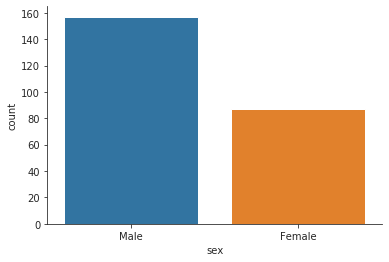

In [80]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

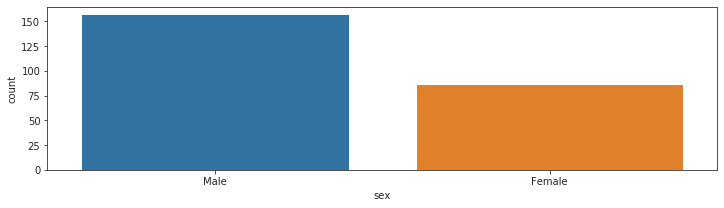

In [82]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

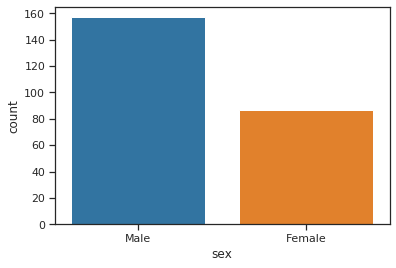

In [85]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

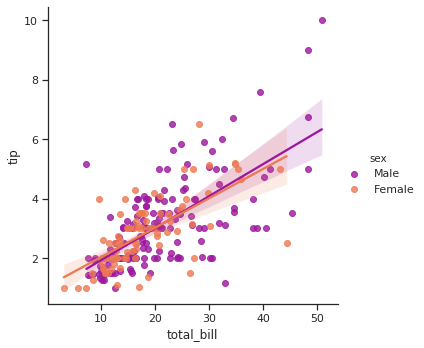

In [91]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='plasma')